# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


## <font color="darkorange"> Note teoriche
### Catena di Markov discreta e matrice di transizione

Una **catena di Markov** discreta può essere rappresentata tramite un grafo, dove i nodi rappresentano gli stati possibili $x_i$ del sistema e le frecce rappresentano le transizioni possibili con le relative probabilità di transizione $T_{ij}$.

Le probabilità di transizione si possono associare alla matrice di transizione $\bf{T}$, i cui elementi sono $T_{ij}$ = probabilità di transizione da $x_i$ a $x_j$.

Ogni riga della matrice rappresenta uno stato di partenza, e la somma delle probabilità di transizione dallo stato $i$ verso tutti gli altri stati possibili $j$ deve essere normalizzata 1:

$$
\sum_j T_{ij} = 1 \quad \forall i
$$

L'evoluzione probabilistica della catena di Markov si può descrivere introducendo la distribuzione di probabilità $\pi^{(k)}$ del sistema al tempo $k$:

$$
\pi^{(k)} = \begin{bmatrix} \pi_1^{(k)}, \pi_2^{(k)}, \dots, \pi_n^{(k)} \end{bmatrix}
$$

dove $\pi_i^{(k)}$ è la probabilità che il sistema sia nello stato $x_i$ al passo $k$ della catena.

L’evoluzione dal passo $k$ al passo successivo $k+1$, espressa in forma matriciale, è data da:

$$
\pi^{(k+1)} = \pi^{(k)} \bf{T}
$$

Iterando:

$$
\pi^{(k)} = \pi^{(0)} \bf{T}^k
$$

e nel limite $k \rightarrow \infty$, la probabilità che il sistema al passo $k$ si trovi nello stato $i$ è definita da:

$$
p_i = \lim_{k \rightarrow \infty}\pi^{(k)}
$$

Una distribuzione di probabilità $\pi$  è detta **invariante** per una matrice di transizione $\bf{T}$ se e solo se:

$$
\pi = \pi \bf{T}
$$

cioè $\pi$ (distribuzione di probabilità del sistema) rimane invariata sotto l’applicazione della matrice di transizione.

Una matrice di transizione $\mathbf{T}$ è detta **irriducibile** se, per ogni coppia di stati $i, j$, esiste un intero $k \geq 1$ tale che $(T^k)_{ij} > 0$. Questo significa che è possibile passare dallo stato $i$ allo stato $j$ in un numero finito di passi $k$, con probabilità positiva.

Una matrice di transizione $\mathbf{T}$ è detta **regolare** se esiste un intero $m > 0$ tale che $(T^m)_{ij} > 0 \quad \text{per tutti gli stati } i, j$. In altre parole, esiste un numero di passi $m$ finito tale che, partendo da qualsiasi stato $i$, è possibile raggiungere qualsiasi altro stato $j$ in esattamente $m$ passi, con probabilità positiva.

La regolarità implica l'irriducibilità ma non il viceversa.

Il teorema di Markov afferma che se una matrice di transizione $\bf{T}$ è regolare, allora esiste un'unica distribuzione invariante $p^*$ e che per ogni distribuzione iniziale $\pi^{(0)}$, vale:

$$
\lim_{k \to \infty} \pi^{(0)} T^k = p^*
$$

L'idea è che se la matrice di transizione è sufficientemente buona, non importa lo stato iniziale da cui si parte, alla fine il sistema si stabilizza sempre alla distribuzione di probabilità $p^*$.

---

### Algoritmo di Metropolis
L'**algoritmo di Metropolis $M(RT)^2$** è un metodo di campionamento basato su tecniche di rigetto, utilizzato per il campionamento di distribuzioni di probabilità, attraverso la costruzione e la simulazione del processo di Markov cui esse sono associate.\
È un algoritmo semplice ed efficiente, che permette di campionare qualsiasi distribuzione di probabilità, di qualunque complessità e in un numero arbitrario di dimensioni, senza la necessità di conoscere la costante di normalizzazione della distribuzione.\
Il principale svantaggio della tecnica è che il campionamento segue effettivamente la distribuzione target solo dopo un numero elevato di steps (nel limite $n \rightarrow \infty$); agli step iniziali, siccome i valori ottenuti sono fortemente correlati (poiché l'algoritmo si basa sulla costruzione di una catena di Markov), il campionamento risulta distorto.

L'algoritmo di Metropolis si basa su un'idea opposta rispetto a quella della meccanica statistica: in quest'ultima, infatti, si parte da una matrice di transizione stocastica di trasferimento $K(x|y)$ (che rappresenta la probabilità che il sistema passi dallo stato $y$ allo stato $x$), e si lascia evolvere il sistema secondo la dinamica da essa fissata fino a raggiungere l’equilibrio. In tale condizione, il sistema segue una certa distribuzione di probabilità $p(x)$, che però in genere è ignota.

Nell’algoritmo di Metropolis, invece, l’approccio è invertito: si sceglie a priori la distribuzione $p(x)$ che si vuole campionare, e si costruisce una probabilità di transizione $K(x|y)$, rispetto alla quale $p(x)$ sia una distribuzione invariante, che governi la dinamica del sistema. Anche il meccanismo di accettazione deve essere tale da mantenere $p(x)$ invariante rispetto alla probabilità di transizione $K(x|y)$. La distribuzione $p(x)$ si dice **invariante** rispetto a $K$ se soddisfa l’equazione integrale:

$$
p(x) = \int K(x|y) \, p(y) \, dy
$$

cioè $p$ rimane stabile applicando il nucleo di transizione (la probabilità di trovarsi in $x$ dopo un passo rimane sempre $p(x)$).

Si supponga di partire da distribuzione qualsiasi $d_1(x)$, non necessariamente invariante rispetto a $K(x|y)$. Iterando la dinamica, si ottiene un processo di Markov non stanzionario caratterizzato da distribuzioni marginali:
$$
d_{n+1}(x) = \int K(x|y) d_n(y) dy
$$

Un nucleo $K(x|y)$ si dice **ergodico** se esiste un’unica distribuzione limite $p(x) > 0$ invariante raggiunta da ogni distribuzione iniziale:

$$
p(x) = \lim_{n \to \infty} d_{n+1}(x) = \lim_{n \to \infty} \int K(x|y) \, d_n(y) \, dy \quad \forall \, d_1(x)
$$

Una successione di funzioni $d_n(x)$ si dice **equi-continua** se:

$$
\forall \, \varepsilon > 0 \,\, \exists \, \delta \ge 0 \,\, \text{tale che} \,\, |x_1 - x_2| < \delta \Rightarrow |d_n(x_1) - d_n(x_2)| < \varepsilon \quad \forall n
$$

Un nucleo $K(x|y)$ si dice **regolare** se e solo se dà origine a una successione di densità di probabilità $d_n(x)$ equi-continue, quando $d_1(x)$ è uniformemente continua. Significa che le distribuzioni di probabilità $d_n$ rimangono "buone" se la distribuzione iniziale $d_1(x)$ è "buona" e se il nucleo $K(x|y)$ è regolare. In tal caso, si ha un’unica distribuzione invariante $p(x)$.

Un nucleo $K(x|y)$ strettamente positivo e regolare è ergodico se e solo se esiste una densità di probabilità invariante $p(x)$ strettamente positiva.

L'idea è quella di trovare una probabilità di transizione $K(x|y)$ regolare che abbia $p(x)$ come distribuzione invariante, cioè: 

$$
p(x) = \int K(x|y) \, p(y) \, dy
$$

e sfruttare le proprietà del nucleo stocastico $K(x|y)$ per campionare $p(x)$ con un processo di Markov , facendo evolvere il sistema per un tempo sufficientemente lungo. É assicurato che la sequenza $d_n(x)$ convergerà a $p(x)$ $\forall d_1(x)$:

$$
p(x) = \lim_{n \to \infty} d_{n+1}(x) = \lim_{n \to \infty} \int K(x|y) \, d_n(y) \, dy \quad \forall \, d_1(x)
$$

Per trovare la forma di $K(x, y),$ solitamente si sfrutta il cosiddetto **principio del bilancio dettagliato**:

$$
K(x|y) \, p(y) = K(y|x) \, p(x)
$$
cioè il fatto che la densità di flusso di probabilità di passare dallo stato $x$ allo stato $y$ è lo stesso di passare dallo stato $y$ allo stato $x$.

Si può mostare che il principio del bilancio dettagliato porta automaticamente all'invarianza di $p(x)$ rispetto a $K(x|y)$. Si può quindi procedere alla costruzione di $K(x|y),$ ipotizzando:

$$
K(x|y) = T(x|y) \cdot A(x|y)
$$

dove:
- $T(x|y)$: probabilità di transizione test;
- $A(x|y)$: probabilità di accettazione della mossa proposta $y \rightarrow x$.

Una scelta tipica nell’algoritmo di Metropolis è:

$$
A(x|y) = \min \left[1, \frac{T(y|x) \, p(x)}{T(x|y) \, p(y)} \right]
$$

Il principio di bilancio dettagliato risulta soddisfatto, dunque $p(x)$ è invariante per $K(x|y) = T(x|y) \cdot A(x|y)$, e vale:

$$
d_{n+1}(x) = \int K(x|y) \, d_n(y) \, dy \quad \xrightarrow[n \to \infty]{} \quad p(x) \quad \forall d_1(x)
$$
Inoltre si può assumere $T(x|y) = T(y|x)$ (cioè una $T$ risulta simmetrica sulle mosse proposte). In tal caso:

$$
A(x|y) = \min \left[1, \frac{p(x)}{p(y)} \right]
$$

L'algoritmo a questo punto si sviluppa nel modo seguente:
- si sceglie uno stato iniziale $x_0$ arbitrario
- si sceglie una probabilità di transizione simmetrica $T(x'|x) = T(x|x')$
- si propone un nuovo stato $x' \sim T(x'|x_n)$, dove $x_n$ è lo stato all'iterazione $n$-esima dell'algoritmo
- si calcola il rapporto di accettazione:
$$
r = \frac{p(x')}{p(x_n)}
$$
- si calcola la probabilità di accettazione:
$$
A = \min(1, r)
$$
- si accetta la mossa con probabilità $A$. Si estrae un numero casuale $u$ uniformemente distribuito in $[0, 1)$ e:
    - se $u \leq A$: si accetta la mossa, quindi $x_{n+1} = x'$ (si sceglie la distribuzione uniforme perchè la probabilità che $u<A$ è proprio $A$, compatibile con la probabilità di accettazione della mossa);
    - altrimenti si rifiuta la mossa, quindi $x_{n+1} = x_n$.

---
### Regola empirica di accettazione al 50%
Una volta equilibrato il sistema, in modo che il campionamento segua effettivamente $p(x)$, il sistema si troverà in uno stato $x_n$ molto probabile, in cui $p(x)$ è alta. Se viene proposta una transizione $T(x'|x_n)$ che corrisponde a steps troppo ampi, si rischia di finire in una regione in cui la probabilità $p(x') << p(x_n)$, dunque il termine di accettazione $p(x')/p(x_n)$ porterà al rigetto di molte mosse, rendendo l'algoritmo poco efficiente. Viceversa, se $T(x'|x_n)$ corrisponde a steps poco ampi, allora $x' \sim x_n$ e $A(x'|x_n) = min[1, p(x')/p(x_n)]$ sarà sempre prossimo a 1, facendo sì che molte mosse vengano accettate, risultando però altamente correlate. Per questo motivo si lavora in modo da garantire un'accettazione sempre prossima al 50%.

---

In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

### *Esercizio 05.1 - Soluzione proposta*

Per lo svolgimento dell'esercizio è stato implementato l’algoritmo di Metropolis per il campionamento della distribuzione di probabilità associata agli orbitali atomici $1s$ e $2p$ dell’atomo di idrogeno. Sono state utilizzate due diverse distribuzioni di transizione $T(x|y)$, entrambe simmetriche:
- una distribuzione uniforme nell’intervallo $[-\delta, \delta]$;
- una distribuzione gaussiana con media 0 e deviazione standard $\sigma$.

I parametri $\delta$ e $\sigma$ sono stati scelti in modo da rispettare la regola empirica dell’accettanza del 50%, che garantisce un buon compromesso tra esplorazione dello spazio delle configurazioni, con riduzione della correlazione, ed efficienza del campionamento.  
A tal fine, sono stati usati i seguenti parametri:
- Orbitale $1s$, transizione uniforme: $\delta = 0.75$
- Orbitale $1s$, transizione gaussiana: $\sigma = 0.75$
- Orbitale $2p$, transizione uniforme: $\delta = 2.8$
- Orbitale $2p$, transizione gaussiana: $\sigma = 1.7$

Prima di iniziare la raccolta dei dati, è stata eseguita una fase di equilibrazione. Poiché l’algoritmo viene avviato da un punto arbitrario nello spazio, esso potrebbe trovarsi inizialmente in una regione di bassa probabilità, non rappresentativa della distribuzione $|\psi(x)|^2$ che si desidera campionare. Ciò provocherebbe distorsioni nel calcolo dei valori medi delle grandezze di interesse, poichè il sistema si troverebbe in una configurazione non compatibile con la distribuzione di probabilità di interesse, e non la si campionerebbe correttamente. Per risolvere questo problema, il sistema è stato fatto evolvere per 5000 step preliminari di Metropolis, e la posizione finale ottenuta è stata utilizzata come punto di partenza per la simulazione vera e propria.

Le posizioni iniziali da cui è partita l’equilibrazione sono state:

- $\rho_{1s} = (0, 0, 0)$ per l’orbitale $1s$
- $\rho_{2p} = (0, 0, 1)$ per l’orbitale $2p$

Queste scelte sono motivate dal fatto che tali posizioni si trovano in zone ad alta densità di probabilità per gli orbitali considerati. Al contrario, se si partisse da punti molto lontani da $\rho_{1s}$ o $\rho_{2p}$, la funzione d’onda (e quindi la densità di probabilità) sarebbe trascurabile, e verrebbe rifiutato un numero eccessivo di mosse dell'algoritmo, con conseguente rallentamento dell’equilibrazione e rischio di generare campioni non rappresentativi.

Anche durante l’equilibrazione è stata monitorata l’accettanza per assicurarsi che la regola empirica fosse rispettata.

La quantità d’interesse, $\langle r \rangle$, rappresenta il valore medio della distanza dell’elettrone dal nucleo e viene definita come:

$$
\langle r \rangle = \int_{\mathbb{R}^3} r \cdot |\psi(\vec{r})|^2 \, d^3r
$$

Trattandosi di un integrale su una distribuzione di probabilità, la stima è stata effettuata secondo il metodo già illustrato nell’Esercitazione 2. In particolare, i risultati sono stati trattati con il metodo del data blocking. Sono stati eseguiti $M = 10^6$ steps dell’algoritmo, suddivisi in $N = 100$ blocchi, ognuno contenente $L = M/N = 10^4$ steps.
Per ciascun blocco è stata calcolata la media $\overline{r}_k$, ovvero:

$$
\overline{r}_k = \frac{1}{L} \sum_{i=1}^{L} r(\vec{x}_i)
$$

Successivamente è stata calcolata la media cumulativa, con relativa deviazione standard, per stimare l’incertezza sulla misura.
La lunghezza dei blocchi nel caso dell'algoritmo di Metropolis risulta di fondamentale importanza. Le configurazioni generate sono infatti correlate: un punto della catena dipende da quello precedente. Se i blocchi fossero troppo corti rispetto alla lunghezza di correlazione, i dati all’interno di un blocco sarebbero correlati, e l’errore statistico risulterebbe sottostimato. Per questo motivo sono stati scelti blocchi piuttosto lunghi (come mostrato nell'Esercitazione 7, la stima rigorosa prevede in realtà il calcolo della funzione di autocorrelazione del set di dati ottenuto, al fine di stimare la lunghezza di blocco opportuna).

I risultati ottenuti, riportati nei grafici sottostanti, mostrano un’ottima compatibilità con i valori teorici attesi:

- $\langle r \rangle_{1s} = \frac{3}{2}$
- $\langle r \rangle_{2p} = 5$

(tutti in unità di raggio di Bohr, $a_0$).

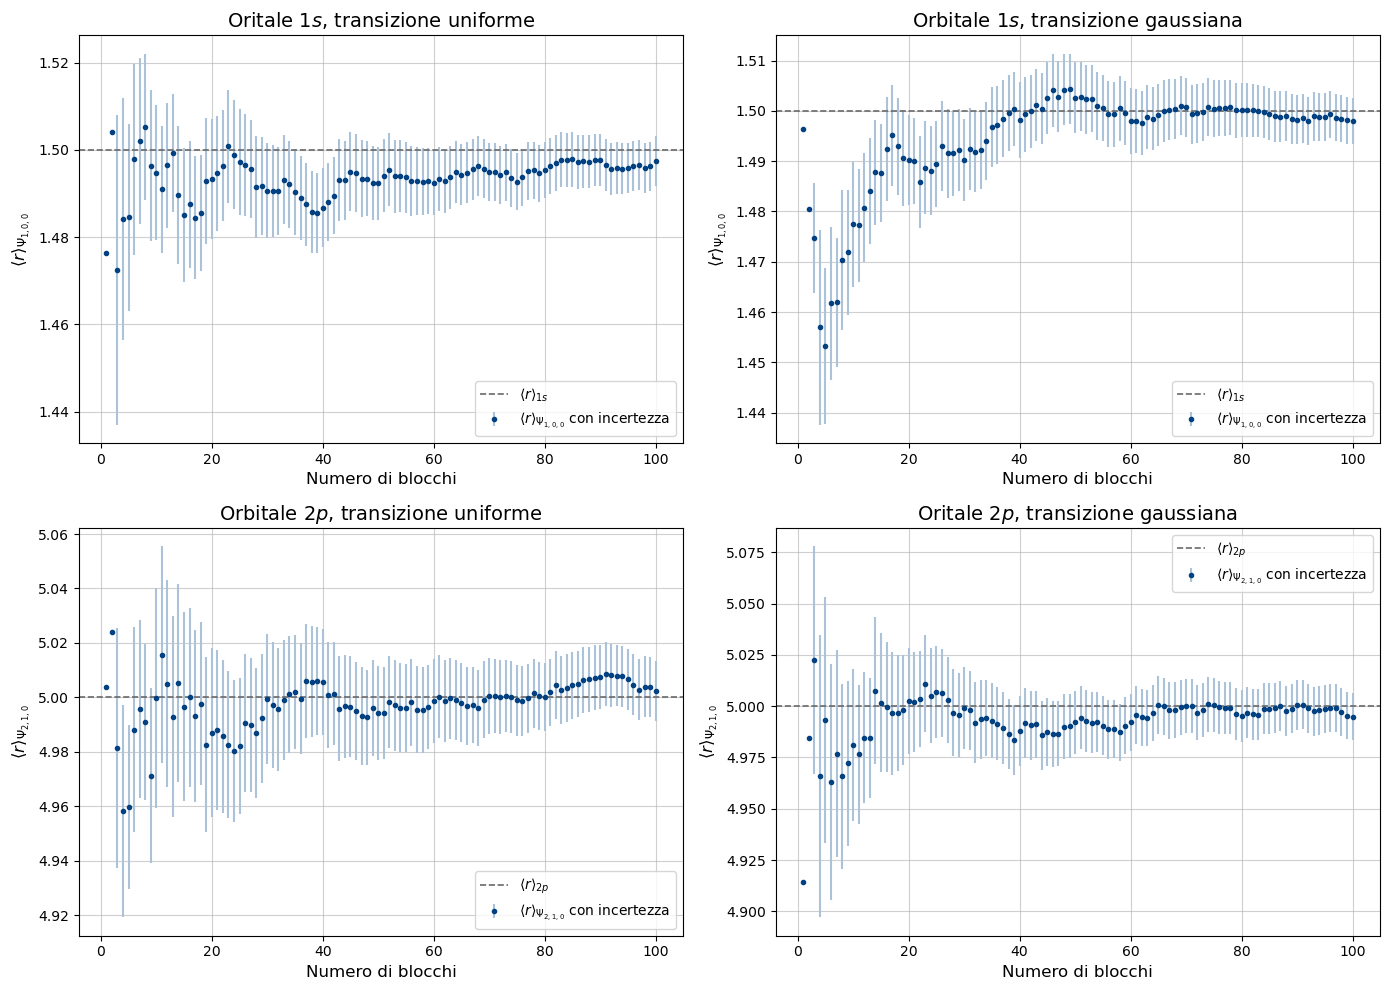

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x, sum_prog, error = np.loadtxt("radius_unif.dat", usecols=(0, 1, 2), unpack=True)
x_gauss, sum_prog_gauss, error_gauss = np.loadtxt("radius_gauss.dat", usecols=(0, 1, 2), unpack=True)
x_2p, sum_prog_2p, error_2p = np.loadtxt("radius_unif_2p.dat", usecols=(0, 1, 2), unpack=True)
x_gauss_2p, sum_prog_gauss_2p, error_gauss_2p = np.loadtxt("radius_gauss_2p.dat", usecols=(0, 1, 2), unpack=True)

plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.errorbar(x, sum_prog, yerr=error, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ con incertezza')
plt.title(r"Oritale $1s$, transizione uniforme", fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$', fontsize=12)
plt.axhline(y=1.5, color='dimgray', linestyle='--', linewidth=1.2, label=r'$\langle r \rangle_{1s}$')
plt.grid(True, alpha=0.6)
plt.legend(loc='lower right')

plt.subplot(2, 2, 2)
plt.errorbar(x_gauss, sum_prog_gauss, yerr=error_gauss, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$ con incertezza')
plt.title(r"Orbitale $1s$, transizione gaussiana", fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\left\langle r \right\rangle_{\Psi_{1,0,0}}$', fontsize=12)
plt.axhline(y=1.5, color='dimgray', linestyle='--', linewidth=1.2, label=r'$\langle r \rangle_{1s}$')
plt.grid(True, alpha=0.6)
plt.legend(loc='lower right')

plt.subplot(2, 2, 3)
plt.errorbar(x_2p, sum_prog_2p, yerr=error_2p, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ con incertezza')
plt.title(r"Orbitale $2p$, transizione uniforme", fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$', fontsize=12)
plt.axhline(y=5, color='dimgray', linestyle='--', linewidth=1.2, label=r'$\langle r \rangle_{2p}$')
plt.grid(True, alpha=0.6)
plt.legend(loc='lower right')

plt.subplot(2, 2, 4)
plt.errorbar(x_gauss_2p, sum_prog_gauss_2p, yerr=error_gauss_2p, fmt='.', color='xkcd:darkish blue', ecolor='xkcd:cloudy blue', label=r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$ con incertezza')
plt.title(r"Oritale $2p$, transizione gaussiana", fontsize=14)
plt.xlabel('Numero di blocchi', fontsize=12)
plt.ylabel(r'$\left\langle r \right\rangle_{\Psi_{2,1,0}}$', fontsize=12)
plt.axhline(y=5, color='dimgray', linestyle='--', linewidth=1.2, label=r'$\langle r \rangle_{2p}$')
plt.grid(True, alpha=0.6)
plt.legend(loc='lower right')

plt.legend()
plt.tight_layout()
plt.show()


I risultati ottenuti con le due probabilità di transizione sono equivalenti. Infatti, il campionamento con l’algoritmo di Metropolis converge sempre alla stessa distribuzione limite $|\psi(\vec{x})|^2$, indipendentemente dalla scelta della probabilità di transizione $T(\vec{x}|\vec{y})$, come spiegato nella sezione teorica.

Per mostrare la correttezza della procedura, si riporta anche il plot relativo alle configurazioni spaziali degli orbitali campionati con probabilità di tranisizone uniforme. Come previsto, l’orbitale $1s$ mostra una forma sferica, mentre l’orbitale $2p$ presenta la caratteristica forma bilobata.

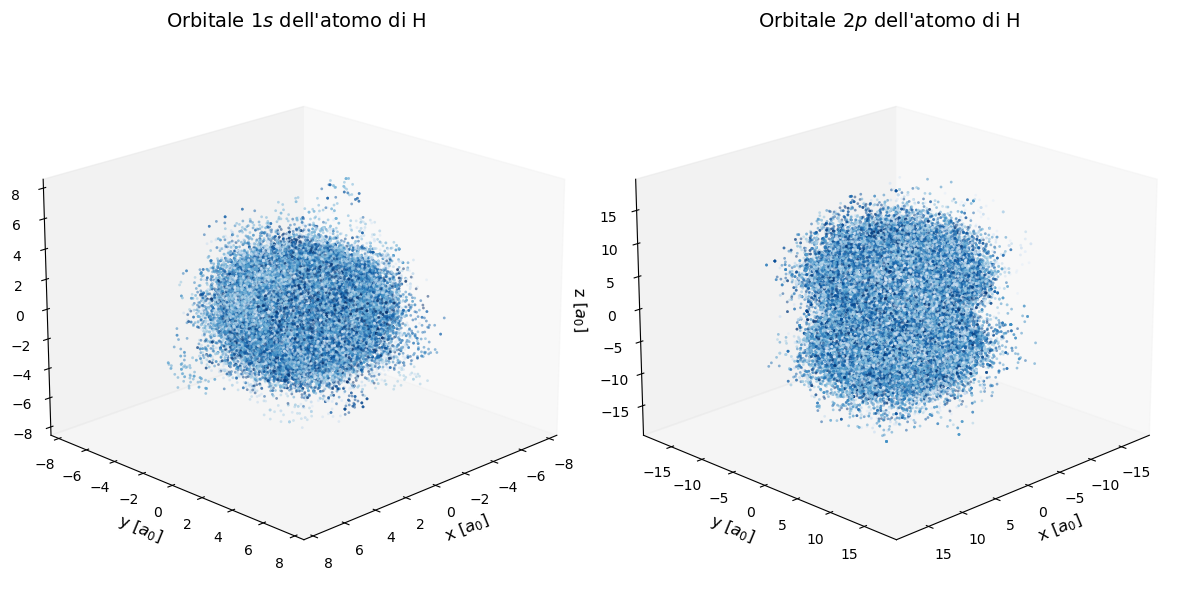

In [32]:
import numpy as np
import matplotlib.pyplot as plt

file_paths = ['points_1s_unif.dat', 'points_2p_unif.dat']
titles = ["Orbitale $1s$ dell'atomo di H", "Orbitale $2p$ dell'atomo di H"]

fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))

for i, ax in enumerate(axs):
        dati = np.loadtxt(file_paths[i])
        if dati.ndim == 1:
            dati = dati.reshape(1, -1)

        x = dati[:, 0]
        y = dati[:, 1]
        z = dati[:, 2]

        colori = plt.cm.Blues(np.linspace(0.1, 1, len(x))) 
        scatter = ax.scatter(x, y, z, c=colori, s=4, alpha=0.5, edgecolors='none')

        ax.set_title(titles[i], fontsize=14)
        ax.set_xlabel('x [$a_0$]', fontsize=12)
        ax.set_ylabel('y [$a_0$]', fontsize=12)
        ax.set_zlabel('z [$a_0$]', fontsize=12)

        lim = np.max(np.abs([x, y, z]))
        ax.set_xlim(-lim, lim)
        ax.set_ylim(-lim, lim)
        ax.set_zlim(-lim, lim)

        ax.view_init(elev=20, azim=45)

        ax.grid(False)
    
plt.tight_layout()
plt.show()
